In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### train metadata

In [3]:
train_metadata = pd.read_csv('Data/new_train_metadata.csv')

In [8]:
age_counts = train_metadata['host_age'].value_counts()
print(age_counts)

host_age
Young Adult             1660
Middle Aged              279
Children Adolescents      15
Name: count, dtype: int64


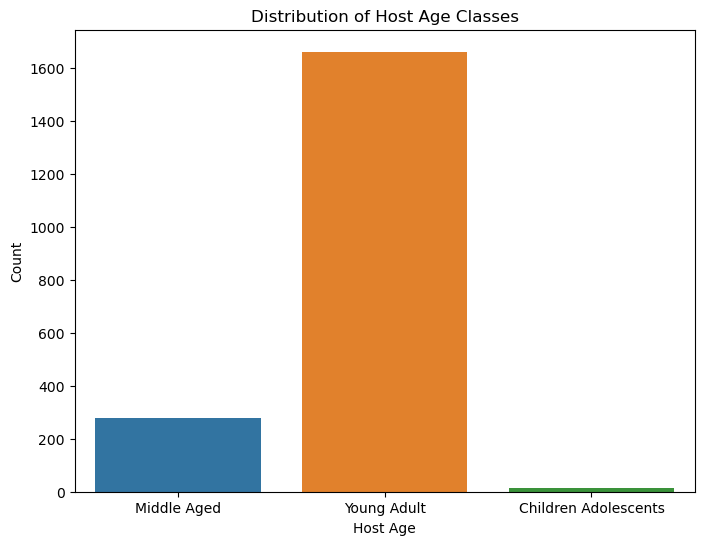

In [13]:
plt.figure(figsize=(8, 6))
sns.countplot(x='host_age', data=train_metadata)
plt.title('Distribution of Host Age Classes')
plt.xlabel('Host Age')
plt.ylabel('Count')
plt.show()

In [14]:
disease_counts = train_metadata['disease'].value_counts()
print(disease_counts)

disease
D006262    1484
D047928     484
Name: count, dtype: int64


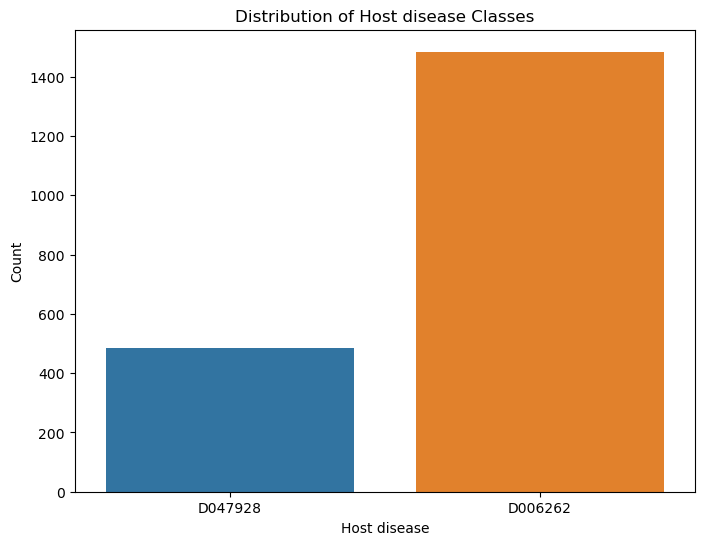

In [15]:
plt.figure(figsize=(8, 6))
sns.countplot(x='disease', data=train_metadata)
plt.title('Distribution of Host disease Classes')
plt.xlabel('Host disease')
plt.ylabel('Count')
plt.show()

### test

In [16]:
test_metadata = pd.read_csv('Data/new_test_metadata.csv')

In [17]:
age_counts = test_metadata['host_age'].value_counts()
print(age_counts)

host_age
Young Adult    306
Middle Aged     78
Name: count, dtype: int64


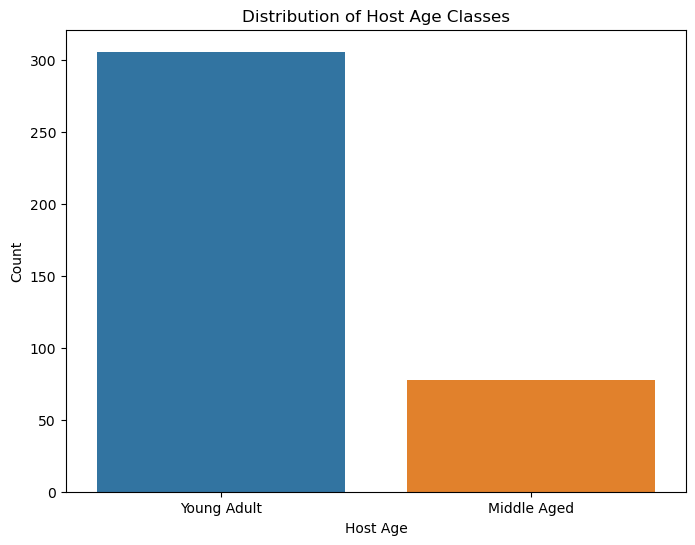

In [18]:
plt.figure(figsize=(8, 6))
sns.countplot(x='host_age', data=test_metadata)
plt.title('Distribution of Host Age Classes')
plt.xlabel('Host Age')
plt.ylabel('Count')
plt.show()

In [19]:
disease_counts = test_metadata['disease'].value_counts()
print(disease_counts)

disease
D006262    214
D047928    170
Name: count, dtype: int64


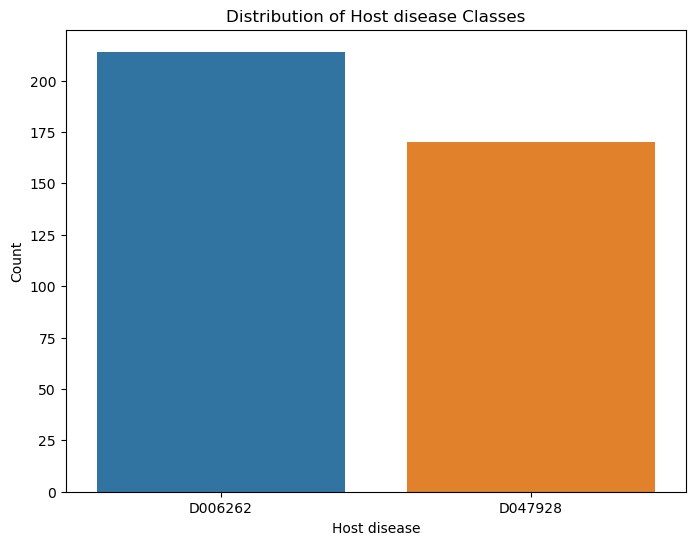

In [20]:
plt.figure(figsize=(8, 6))
sns.countplot(x='disease', data=test_metadata)
plt.title('Distribution of Host disease Classes')
plt.xlabel('Host disease')
plt.ylabel('Count')
plt.show()